# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

# The purpose of this module is to ignore the red warnings so the output is not so cluttered with the errors.

import warnings
warnings.filterwarnings('ignore')

/home/jiaoyinyang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load .env enviroment variables
load_dotenv("keys.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url)
btc_response = btc_price.content
btc_data = btc_price.json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

print(f"The Current Price of BTC:\n${btc_price:,.2f}\n")

# Fetch current ETH price
# YOUR CODE HERE!
eth_price = requests.get(eth_url)
eth_response = eth_price.contenteth_data = eth_price.json()
eth_data = eth_price.json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

print(f"The Current Price of ETH:\n${eth_price:,.2f}\n")

# Compute current value of my crypto
# YOUR CODE HERE!

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

The Current Price of BTC:
$39,907.00

The Current Price of ETH:
$2,207.06

The current value of your 1.2 BTC is $47,888.40
The current value of your 5.3 ETH is $11,697.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start = pd.Timestamp("2023-01-01", tz="America/New_York").isoformat()

# Timestamp.now() doesn't give me the same output
current_time = pd.Timestamp.now()
today = current_time.strftime('%Y-%m-%d')
today = pd.Timestamp(today, tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio.tail()

SPY                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2024-01-18 05:00:00+00:00  476.49  477.060  472.4200      558708  474.01   
2024-01-19 05:00:00+00:00  482.43  482.720  476.5374      608468  477.65   
2024-01-22 05:00:00+00:00  483.45  485.220  482.7800      548090  484.01   
2024-01-23 05:00:00+00:00  484.86  485.105  482.8900      388250  484.01   
2024-01-24 05:00:00+00:00  485.39  488.770  484.8819      621289  487.81   

                                                    AGG                    \
                              volume        vwap  close     high      low   
timestamp                                                                   
2024-01-18 05:00:00+00:00   91856348  474.745846  98.00  98.1950  97.8900   
2024-01-19 05:00:00+00:00  110834483  479.966713  98.02  98.0200  97.6714   
2024-01-22 05:00:00+00:00   76044931  483.678472  98.20  98.3556  98.1000   
2024-01-23 05:00:00+00:00   49899264  484.053254  97.96  98.0000  97.8200   
2024-01-24 05:00:00+00:00   81764592  486.643732  97.74  98.3300  97.7000   

                                                                   
                          trade_count   open    volume       vwap  
timestamp                                                          
2024-01-18 05:00:00+00:00       26014  98.16  10575151  98.017836  
2024-01-19 05:00:00+00:00       32022  97.89   9126093  97.904350  
2024-01-22 05:00:00+00:00       28012  98.26   8712582  98.215700  
2024-01-23 05:00:00+00:00       20536  97.99   5642830  97.913470  
2024-01-24 05:00:00+00:00       42228  98.29  11278509  97.890250

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = df_portfolio["AGG"]["close"][-1]
spy_close_price = df_portfolio["SPY"]["close"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:,.2f}")
print(f"Current SPY closing price: ${spy_close_price:,.2f}")

Current AGG closing price: $97.74
Current SPY closing price: $485.39


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:,.2f}")

The current value of your 50 SPY shares is $24,269.50
The current value of your 200 AGG shares is $19,548.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000
total_value_crypto = my_btc_value + my_eth_value
total_value_stocks = my_agg_value + my_spy_value

# Consolidate financial assets data
# YOUR CODE HERE!

total_portfolio_dictionary = {'Amount': [total_value_crypto,total_value_stocks]}

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

# It's important to note that I decided NOT to format the values in this dataframe because if I did, I wouldn't be able to create a pie chart later with formated values. I need to leave those values alone. The more efficient thing to do is to keep the dataframe the way it is, but format the display as mention below.

pd.options.display.float_format = '${:,.2f}'.format

,Amount
Crypto,59585.818
Shares,43817.500


<Axes: title={'center': 'Stocks Portfolio Composition'}, ylabel='Amount'>

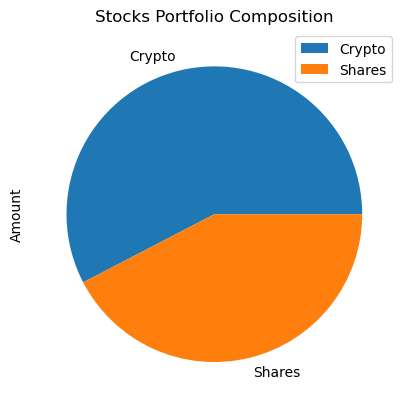

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Stocks Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
portfolio_value = total_value_crypto + total_value_stocks

# Validate saving health
# YOUR CODE HERE!
if portfolio_value > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
elif portfolio_value == emergency_fund:
    print("Congratulations! You have reached an important financial goal.")
else:
    print(f"You are ${emergency_fund - portfolio_value} away from reaching your savings goal.")

Congratulations! You have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["SPY", "AGG"]
timeframe = "1Day"

ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Display sample data
df_stock_data.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-05-02 04:00:00+00:00 $207.97 $208.18 $206.41      263586 $206.92   
2016-05-03 04:00:00+00:00 $206.16 $206.80 $205.28      377523 $206.52   
2016-05-04 04:00:00+00:00 $205.01 $205.85 $204.42      345266 $204.99   
2016-05-05 04:00:00+00:00 $204.97 $205.98 $204.47      280626 $205.56   
2016-05-06 04:00:00+00:00 $205.72 $205.77 $203.88      340162 $204.06   

                                                 AGG                  \
                              volume    vwap   close    high     low   
timestamp                                                              
2016-05-02 04:00:00+00:00   64747229 $207.31 $110.61 $110.74 $110.52   
2016-05-03 04:00:00+00:00  108050343 $206.31 $110.81 $110.94 $110.75   
2016-05-04 04:00:00+00:00   94995641 $205.09 $110.86 $110.93 $110.76   
2016-05-05 04:00:00+00:00   68425268 $205.14 $111.14 $111.16 $110.80   
2016-05-06 04:00:00+00:00   90999800 $204.94 $110.97 $111.12 $110.97   

                                                                
                          trade_count    open   volume    vwap  
timestamp                                                       
2016-05-02 04:00:00+00:00       15122 $110.74  3608552 $110.63  
2016-05-03 04:00:00+00:00       15663 $110.89  3128774 $110.86  
2016-05-04 04:00:00+00:00       13984 $110.91  3096337 $110.88  
2016-05-05 04:00:00+00:00       15708 $110.92  3052967 $111.03  
2016-05-06 04:00:00+00:00       12697 $111.12  2922700 $111.03

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_30 = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30.portfolio_data.head()

SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2016-05-02 04:00:00+00:00 $207.97 $208.18 $206.41      263586 $206.92   
2016-05-03 04:00:00+00:00 $206.16 $206.80 $205.28      377523 $206.52   
2016-05-04 04:00:00+00:00 $205.01 $205.85 $204.42      345266 $204.99   
2016-05-05 04:00:00+00:00 $204.97 $205.98 $204.47      280626 $205.56   
2016-05-06 04:00:00+00:00 $205.72 $205.77 $203.88      340162 $204.06   

                                                              AGG          \
                              volume    vwap daily_return   close    high   
timestamp                                                                   
2016-05-02 04:00:00+00:00   64747229 $207.31          NaN $110.61 $110.74   
2016-05-03 04:00:00+00:00  108050343 $206.31       $-0.01 $110.81 $110.94   
2016-05-04 04:00:00+00:00   94995641 $205.09       $-0.01 $110.86 $110.93   
2016-05-05 04:00:00+00:00   68425268 $205.14       $-0.00 $111.14 $111.16   
2016-05-06 04:00:00+00:00   90999800 $204.94        $0.00 $110.97 $111.12   

                                                                        \
                              low trade_count    open   volume    vwap   
timestamp                                                                
2016-05-02 04:00:00+00:00 $110.52       15122 $110.74  3608552 $110.63   
2016-05-03 04:00:00+00:00 $110.75       15663 $110.89  3128774 $110.86   
2016-05-04 04:00:00+00:00 $110.76       13984 $110.91  3096337 $110.88   
2016-05-05 04:00:00+00:00 $110.80       15708 $110.92  3052967 $111.03   
2016-05-06 04:00:00+00:00 $110.97       12697 $111.12  2922700 $111.03   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00        $0.00  
2016-05-04 04:00:00+00:00        $0.00  
2016-05-05 04:00:00+00:00        $0.00  
2016-05-06 04:00:00+00:00       $-0.00

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,...,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00
1,$1.00,$1.00,$1.00,$1.00,$0.99,$1.01,$1.00,$0.99,$1.00,$1.00,...,$1.01,$1.00,$1.00,$1.00,$1.00,$1.00,$1.00,$1.01,$1.01,$1.00
2,$1.00,$1.00,$0.99,$1.00,$1.00,$1.00,$1.00,$0.98,$1.00,$1.00,...,$1.01,$1.01,$1.00,$1.00,$1.00,$1.00,$1.00,$1.01,$1.01,$1.00
3,$1.00,$1.00,$1.00,$0.99,$1.00,$0.99,$1.00,$0.98,$1.00,$1.01,...,$1.01,$1.00,$1.00,$1.00,$1.00,$1.00,$0.99,$1.00,$1.00,$1.00
4,$0.99,$1.00,$0.99,$0.99,$1.00,$1.00,$0.99,$0.98,$1.01,$1.01,...,$1.01,$1.01,$1.00,$1.01,$1.00,$0.99,$0.99,$1.00,$1.01,$1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,$4.03,$12.55,$7.79,$7.82,$6.99,$8.59,$15.06,$7.75,$8.00,$3.96,...,$8.87,$5.09,$13.11,$6.28,$7.10,$5.32,$5.34,$3.70,$4.77,$5.32
7557,$4.02,$12.63,$7.80,$7.84,$7.00,$8.68,$15.20,$7.73,$8.01,$3.98,...,$8.90,$5.12,$13.06,$6.28,$7.02,$5.29,$5.35,$3.71,$4.77,$5.31
7558,$4.04,$12.56,$7.82,$7.82,$7.04,$8.71,$15.25,$7.81,$7.98,$4.00,...,$8.86,$5.10,$13.04,$6.32,$7.01,$5.31,$5.36,$3.72,$4.75,$5.29
7559,$4.05,$12.51,$7.79,$7.79,$7.06,$8.72,$15.31,$7.79,$7.99,$4.03,...,$8.83,$5.08,$13.02,$6.40,$6.97,$5.31,$5.36,$3.71,$4.81,$5.30


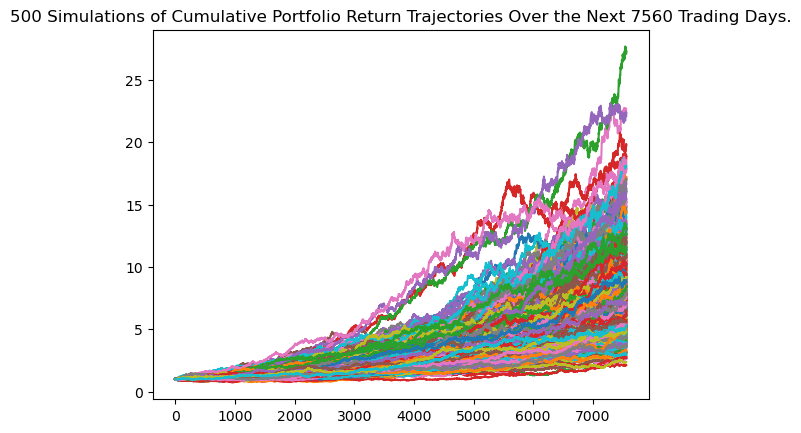

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30.plot_simulation()

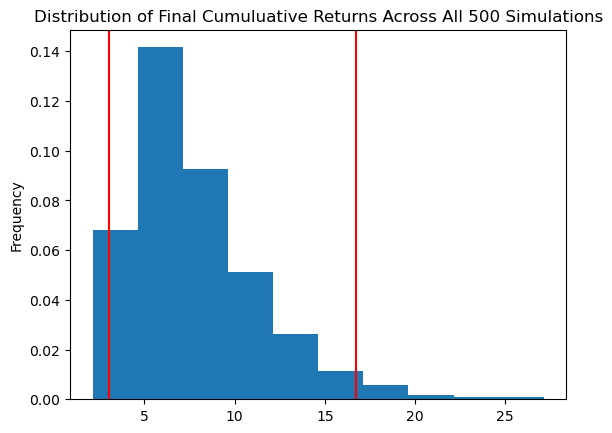

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30.summarize_cumulative_return()

# Print the combined summary statistics
# print(summary_statistics)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")